In [11]:
import itertools
from basics import *
from plotting import *

plt.style.use("paper")

In [3]:
root_dir = "../data/covsplit/"
models = sorted(os.listdir(root_dir))
evals = [111]

In [4]:
dfs = []
for m, ev in itertools.product(models, evals):
    _df = pd.read_csv(f"{root_dir}/{m}/{ev}-covsplit-test.csv", index_col=0)
    _df["model"] = m
    _df["eval"] = int(ev)
    dfs.append(_df)
df = pd.concat(dfs, axis=0)

In [6]:
df["npred"] = df["pred"] / df["nads"]
df["ntrue"] = df["energy"] / df["nads"]

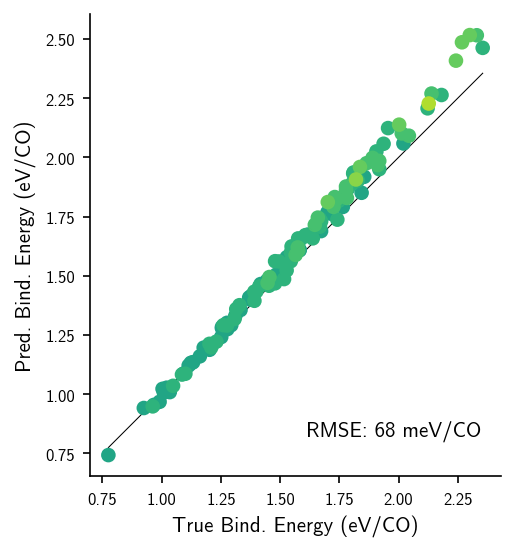

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))

norm = plt.Normalize(1, 18)

_x = df["ntrue"]
_y = df["npred"]
err = _y - _x
rmse = np.sqrt((err ** 2).mean())

ax.scatter(_x, _y, c=df["nads"], norm=norm, cmap="viridis")

lims = [_x.min(), _x.max()]
ax.plot(lims, lims, "k-", zorder=-1, linewidth=0.5)

ax.set_xlabel("True Bind. Energy (eV/CO)")
ax.set_ylabel("Pred. Bind. Energy (eV/CO)")

ax.set_aspect("equal")

ax.annotate(
    f"RMSE: {rmse * 1000:.0f} meV/CO",
    (0.95, 0.1),
    xycoords="axes fraction",
    ha="right",
    va="center"
)

plt.show()